<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/inverted_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e116475c6505d419888cd175eaae11db7f6a956132e3ed200bc232d8ced1320b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


49.98969284683569


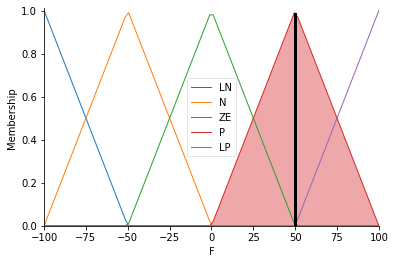

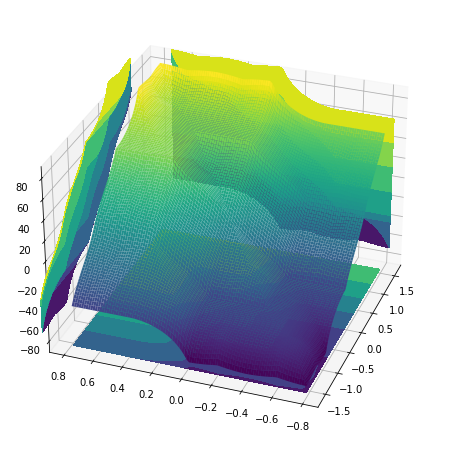

In [6]:
from networkx.algorithms.bipartite import projection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

espace = np.linspace(-np.pi/2,np.pi/2,100)
despace = np.linspace(-np.pi/4,np.pi/4,100)
Fspace = np.linspace(-100, 100, 100)

e = ctrl.Antecedent(espace, 'errol')
de = ctrl.Antecedent(despace, 'd(errol)')

F = ctrl.Consequent(Fspace,'F')

nameErrol = ['LN','N','ZE','P','LP']
nameDerrol = ['LN','N','ZE','P','LP']
nameF = ['LN','N','ZE','P','LP']

e.automf(names = nameErrol)
de.automf(names = nameDerrol)
F.automf(names = nameF)



rule = []
rule.append(ctrl.Rule(antecedent=((e['LN'] & de['LN'])|(e['LN'] & de['N'])|(e['LN'] & de['ZE'])|
                                  (e['N'] & de['LN'])),consequent=F['LN'],label='LN'))

rule.append(ctrl.Rule(antecedent=((e['ZE'] & de['LN'])|(e['N'] & de['N'])|(e['ZE'] & de['N'])|
                                  (e['N'] & de['ZE'])|(e['LN'] & de['P'])|(e['LN'] & de['LP'])),consequent=F['N'],label='N'))

rule.append(ctrl.Rule(antecedent=((e['P'] & de['LN'])|(e['P'] & de['N'])|(e['ZE'] & de['ZE'])|
                                  (e['N'] & de['P'])|(e['N'] & de['LP'])),consequent=F['ZE'],label='ZE'))

rule.append(ctrl.Rule(antecedent=((e['LP'] & de['LN'])|(e['LP'] & de['N'])|(e['P'] & de['ZE'])|
                                  (e['P'] & de['P'])|(e['ZE'] & de['P'])|(e['ZE'] & de['LP'])),consequent=F['P'],label='P'))

rule.append(ctrl.Rule(antecedent=((e['LP'] & de['ZE'])|(e['LP'] & de['P'])|(e['LP'] & de['LP'])|(e['P'] & de['LP'])),consequent=F['LP'],label='LP'))

F_control = ctrl.ControlSystem(rule)
F_simulation = ctrl.ControlSystemSimulation(F_control, flush_after_run = 100*100 + 1)

F_simulation.input['errol'] = 90*np.pi/180
F_simulation.input['d(errol)'] = -90*np.pi/180

F_simulation.compute()

print(F_simulation.output['F'])

F.view(sim = F_simulation)

upsampled1 = np.linspace(-np.pi/2,np.pi/2,100)
upsampled2 = np.linspace(-np.pi/4,np.pi/4,100)

x,y = np.meshgrid(upsampled1, upsampled2)
z= np.zeros_like(x)

for i in range(100):
  for j in range(100):
    F_simulation.input['errol'] = x[i,j]
    F_simulation.input['d(errol)'] = y[i,j]
    F_simulation.compute()
    z[i,j] = F_simulation.output['F']

fig = plt.figure(figsize= (8,8))
ax = fig.add_subplot(111, projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset= -90,cmap='viridis')
cset = ax.contourf(x,y,z,zdir='x',offset= 2,cmap='viridis')
cset = ax.contourf(x,y,z,zdir='y',offset=1,cmap='viridis')
ax.view_init(30,200)